In [5]:
import math
import numpy as np
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.display import display
from config import SAMPLE_RATE, nsamples, sample_space, angular_freq

# Filters

Filters remove certain frequencies in order to shape the sound and alter the waveform, hence the technique is often called **subtractive synthesis** You use a filter when you dial down on that cut-off knob to find the gooiest, resonance-enriched groove. We use filters to kill hi-hats or drop out the kick drum, we use them to give a perceived movement in pitch or to fit sounds between sounds

Filters are used to selectively emphasize or attenuate specific frequency components in the signal, allowing for creative sound manipulation and sculpting.

Synths also allow chaining multiple filters to achieve complex timbral modifications. The choice of filter types and their parameters significantly influences the resulting sound and contributes to the distinctive character of a synthesizer's sound palette.

The gain in a filter determines how much the filter modifies the amplitude (volume) of the frequencies in the signal passing through it.

**Filter Gain or Amplification:** This refers to the overall gain or amplification applied by the filter to the signal passing through it. A positive gain value amplifies the signal, making it louder, while a negative gain value attenuates the signal, making it quieter.

**Gain at Cutoff Frequency:** The cutoff frequency is a key parameter in filters that determines which frequencies are affected by the filter. The gain at the cutoff frequency indicates the amount of amplification or attenuation applied to the signal at that specific frequency.

**Resonance (Q):** Resonance, often represented by the Q factor, is related to the width of the filter's frequency response. Higher resonance settings can emphasize frequencies near the cutoff point, creating a sharper peak in the frequency response. Resonance effectively controls the gain around the cutoff frequency.


There are various types of Filters


### Lowpass Filter (LPF):

Allows frequencies below a specified cutoff frequency to pass through while attenuating higher frequencies.
Useful for creating warm and mellow sounds by reducing high-frequency content.


In [19]:
# Parameters
sampling_rate = SAMPLE_RATE  # Sampling rate in Hz
frequency = 100  # Frequency of the sine wave in Hz
cutoff_frequency = 10  # Cutoff frequency of the lowpass filter in Hz
amp=1E4

sine_wave = np.sin(angular_freq(frequency))*amp

# Lowpass filter
nyquist = 0.5 * sampling_rate
normal_cutoff = cutoff_frequency / nyquist
filter_type = "low" # Low Pass Filter
order = 1
b, a = signal.butter(order, normal_cutoff, btype=filter_type, analog=False)

# Apply the lowpass filter to the sine wave
filtered_sine_wave = signal.filtfilt(b, a, sine_wave)

In [20]:
ipd.Audio(sine_wave.astype(np.int16), rate=SAMPLE_RATE)

In [21]:
ipd.Audio(filtered_sine_wave.astype(np.int16), rate=SAMPLE_RATE)

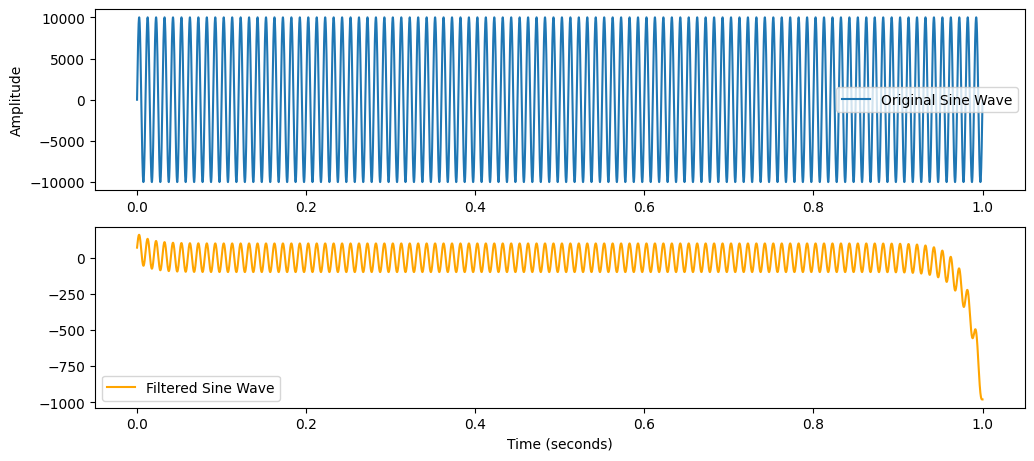

In [22]:
# PLOT #
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(sample_space, sine_wave, label='Original Sine Wave')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sample_space, filtered_sine_wave, label='Filtered Sine Wave', color='orange')
plt.xlabel('Time (seconds)')
plt.legend()

### Filter Types

- Lowpass Filter { Allows frequencies below a specified cutoff frequency to pass through }
- Highpass Filter { Allows frequencies above a specified cutoff frequency to pass through }
- Bandpass Filter { Allows a specific range of frequencies (a "band") to pass through }

and tons more like Notch Filter, Allpass Filter Comb Filter, Waveshaper etc..

In [91]:
def synth_filter(
        wave, # wave
        cutoff, # the cut frequency
        sampling_rate=SAMPLE_RATE,
        btype="low", # {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’},
        order=1 # Order/Accuracy of the filter
    ):
    nyq = 0.5 * sampling_rate # Nyquist frequency: Half of Sampling rate
    if isinstance(cutoff, list):
        _cutoff = []
        _cutoff.insert(0, cutoff[0] / nyq)
        _cutoff.insert(1, cutoff[1] / nyq)
    else:
        _cutoff = cutoff / nyq
    b, a = signal.butter(order, _cutoff, btype=btype, analog=False)
    y = signal.filtfilt(b, a, wave)
    return y

In [92]:
frequency = 100
wave = np.sin(angular_freq(frequency))*amp
cutoff = 50  # desired cutoff frequency of the filter, Hz
filtered_sin_hpf = synth_filter(
    wave,
    cutoff,
    btype="high", # high-pass filter
)

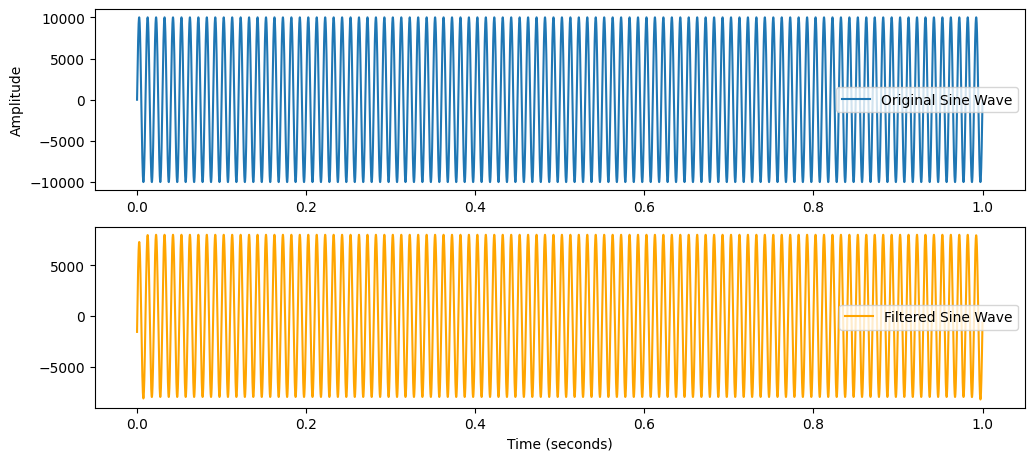

In [93]:
# PLOT #
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(sample_space, wave, label='Original Sine Wave')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sample_space, filtered_sin_hpf, label='Filtered Sine Wave', color='orange')
plt.xlabel('Time (seconds)')
plt.legend()

### Band Pass filter

Allows a specific range of frequencies i.e a "band" to pass through

In [122]:
frequency = 1000
wave = np.sin(angular_freq(frequency))*amp
filtered_sin_band = synth_filter(
    wave,
    [100, 800], # Cutoff
    btype="band", # band-pass filter
    order=5
)

In [123]:
ipd.Audio(wave, rate=SAMPLE_RATE)

In [124]:
ipd.Audio(filtered_sin_band, rate=SAMPLE_RATE)

## Effects with BandPass

By playing around with the center frequency and bandwidth of a band-pass filter, we can create a variety of sound effects


- **The center frequency** is the frequency at which the filter provides maximum attenuation. 

- **The bandwidth** is the range of frequencies that the filter allows to pass through

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
frequency = 440.0  # Frequency of the sine wave (Hz)
nyq = 0.5 * SAMPLE_RATE

# Generate a sine wave
sine_wave = np.sin(angular_freq(frequency))

In [25]:
print("Original Sine wave")
display(ipd.Audio(sine_wave, rate=SAMPLE_RATE))

print("## Playing with Band-pass filter parameters ##\n")

# Band-pass filter parameters
center_frequencies = [500, 1000, 2000]  # Varying center frequencies (Hz)
bandwidths = [200, 600, 800]  # Varying bandwidths (Hz)

for i, center_frequency in enumerate(center_frequencies):
    for j, bandwidth in enumerate(bandwidths):
        # Design a band-pass filter
        low = (center_frequency - bandwidth / 2.0) / nyq
        high = (center_frequency + bandwidth / 2.0) / nyq
        b, a = signal.butter(N=5, Wn=[low, high], btype='band')

        # Apply the band-pass filter to the sine wave
        filtered_wave = signal.lfilter(b, a, sine_wave)
        print(f"center_frequency: {center_frequency} bandwidth: {bandwidth}")
        display(ipd.Audio(filtered_wave, rate=SAMPLE_RATE))

Original Sine wave


## Playing with Band-pass filter parameters ##

center_frequency: 500 bandwidth: 200


center_frequency: 500 bandwidth: 600


center_frequency: 500 bandwidth: 800


center_frequency: 1000 bandwidth: 200


center_frequency: 1000 bandwidth: 600


center_frequency: 1000 bandwidth: 800


center_frequency: 2000 bandwidth: 200


center_frequency: 2000 bandwidth: 600


center_frequency: 2000 bandwidth: 800


- https://www.electronics-tutorials.ws/filter/filter_8.html
- https://cmtext.indiana.edu/synthesis/chapter4_filters.php
- https://moltenmusictechnology.com/a-beginners-guide-to-synthesizer-filters
